In [1]:
##########################
##                      ##
## Irving Gomez Mendez  ##
##   October 17, 2021   ##
##                      ##
##########################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

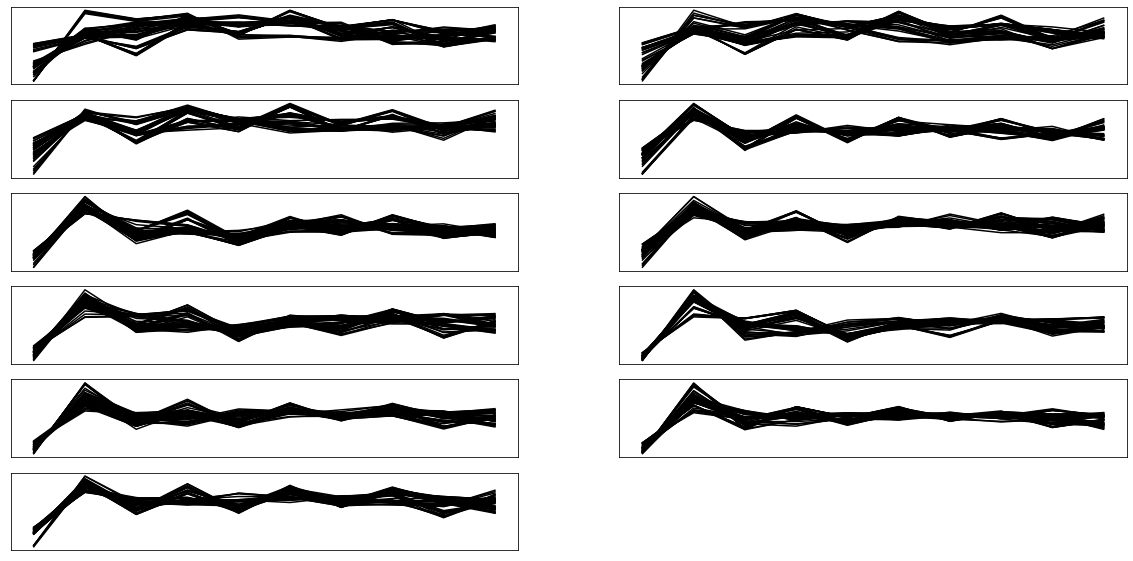

In [3]:
dat_train = pd.read_csv('vowel_train.csv')
dat_train.drop('row.names', axis=1, inplace=True)
n_train = dat_train.shape[0]

dat_test = pd.read_csv('vowel_test.csv')
dat_test.drop('row.names', axis=1, inplace=True)
n_test = dat_test.shape[0]

plt.figure(figsize=(20,10))
for i in range(dat_train['y'].nunique()):
  plt.subplot(6, 2, i+1)
  dat_aux = dat_train[dat_train['y'] == i+1]
  dat_aux.drop('y', axis=1, inplace=True)
  plt.plot(dat_aux.T, color='black')
  plt.xticks([])
  plt.yticks([])

In [4]:
# using linear regression
Y_train = pd.get_dummies(dat_train['y'])
X_train = dat_train.drop('y', axis=1)
X_train = pd.concat([pd.Series(np.ones(n_train)), X_train], axis=1)

Y_test = pd.get_dummies(dat_test['y'])
X_test = dat_test.drop('y', axis=1)
X_test = pd.concat([pd.Series(np.ones(n_test)), X_test], axis=1)

beta_hat = np.linalg.solve(X_train.T @ X_train, X_train.T @ Y_train)
linreg_train = X_train @ beta_hat
linreg_test  = X_test @ beta_hat

Y_train_hat_linreg =  linreg_train.idxmax(axis=1) +1
Y_test_hat_linreg  =  linreg_test.idxmax(axis=1) +1

print(round((1-np.diag(confusion_matrix(dat_train['y'], Y_train_hat_linreg)).sum()/n_train)*100))
print(round((1-np.diag(confusion_matrix(dat_test['y'], Y_test_hat_linreg)).sum()/n_test)*100))


48
67


In [5]:

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(dat_train.drop('y', axis=1), dat_train['y'])

Y_train_hat_logreg = logreg.predict(dat_train.drop('y', axis=1))
Y_test_hat_logreg = logreg.predict(dat_test.drop('y', axis=1))

print(round((1-np.diag(confusion_matrix(dat_train['y'], Y_train_hat_logreg)).sum()/n_train)*100))
print(round((1-np.diag(confusion_matrix(dat_test['y'], Y_test_hat_logreg)).sum()/n_test)*100))

27
54


In [6]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(dat_train.drop('y', axis=1), dat_train['y'])

Y_train_hat_lda = lda.predict(dat_train.drop('y', axis=1))
Y_test_hat_lda = lda.predict(dat_test.drop('y', axis=1))

print(round((1-np.diag(confusion_matrix(dat_train['y'], Y_train_hat_lda)).sum()/n_train)*100))
print(round((1-np.diag(confusion_matrix(dat_test['y'], Y_test_hat_lda)).sum()/n_test)*100))

32
56


In [7]:
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(dat_train.drop('y', axis=1), dat_train['y'])

Y_train_hat_qda = qda.predict(dat_train.drop('y', axis=1))
Y_test_hat_qda = qda.predict(dat_test.drop('y', axis=1))

print(round((1-np.diag(confusion_matrix(dat_train['y'], Y_train_hat_qda)).sum()/n_train)*100))
print(round((1-np.diag(confusion_matrix(dat_test['y'], Y_test_hat_qda)).sum()/n_test)*100))

1
53


In [8]:
confusion_matrix_train_lda = confusion_matrix(dat_train['y'], Y_train_hat_lda)
confusion_matrix_test_lda  = confusion_matrix(dat_test['y'], Y_test_hat_lda)

[Text(0.5, 0, '1'),
 Text(1.5, 0, '2'),
 Text(2.5, 0, '3'),
 Text(3.5, 0, '4'),
 Text(4.5, 0, '5'),
 Text(5.5, 0, '6'),
 Text(6.5, 0, '7'),
 Text(7.5, 0, '8'),
 Text(8.5, 0, '9'),
 Text(9.5, 0, '10'),
 Text(10.5, 0, '11')]

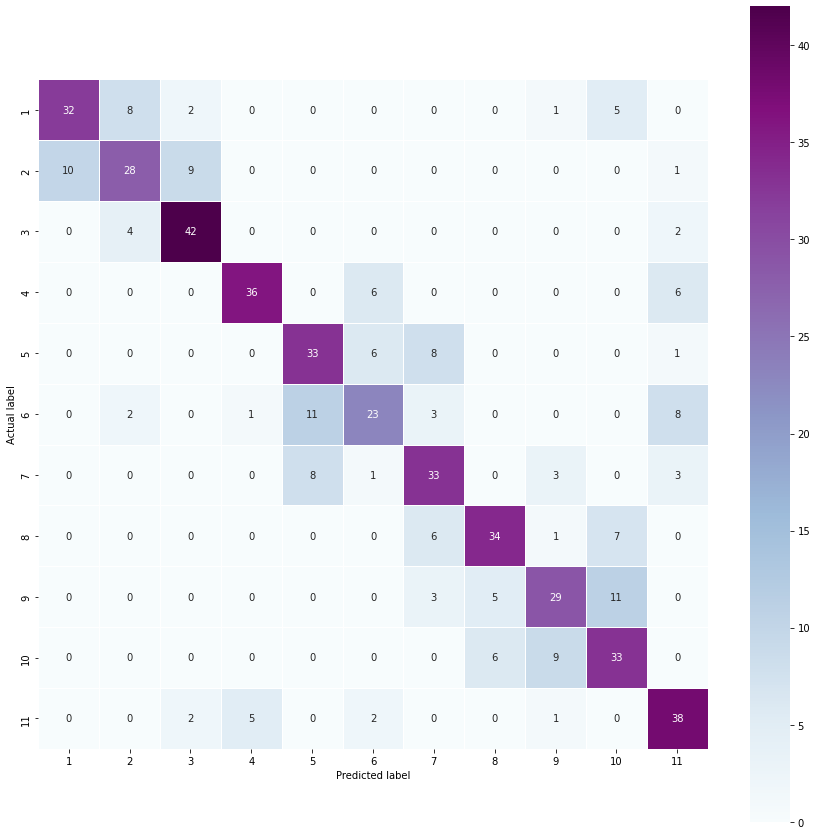

In [9]:
plt.figure(figsize=(15,15))
ax = plt.subplot()
sns.heatmap(confusion_matrix_train_lda, annot=True,
            linewidths=.5, square = True, cmap='BuPu', fmt='g', ax=ax)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.yaxis.set_ticklabels(dat_train['y'].unique())
ax.xaxis.set_ticklabels(dat_train['y'].unique())

[Text(0.5, 0, '1'),
 Text(1.5, 0, '2'),
 Text(2.5, 0, '3'),
 Text(3.5, 0, '4'),
 Text(4.5, 0, '5'),
 Text(5.5, 0, '6'),
 Text(6.5, 0, '7'),
 Text(7.5, 0, '8'),
 Text(8.5, 0, '9'),
 Text(9.5, 0, '10'),
 Text(10.5, 0, '11')]

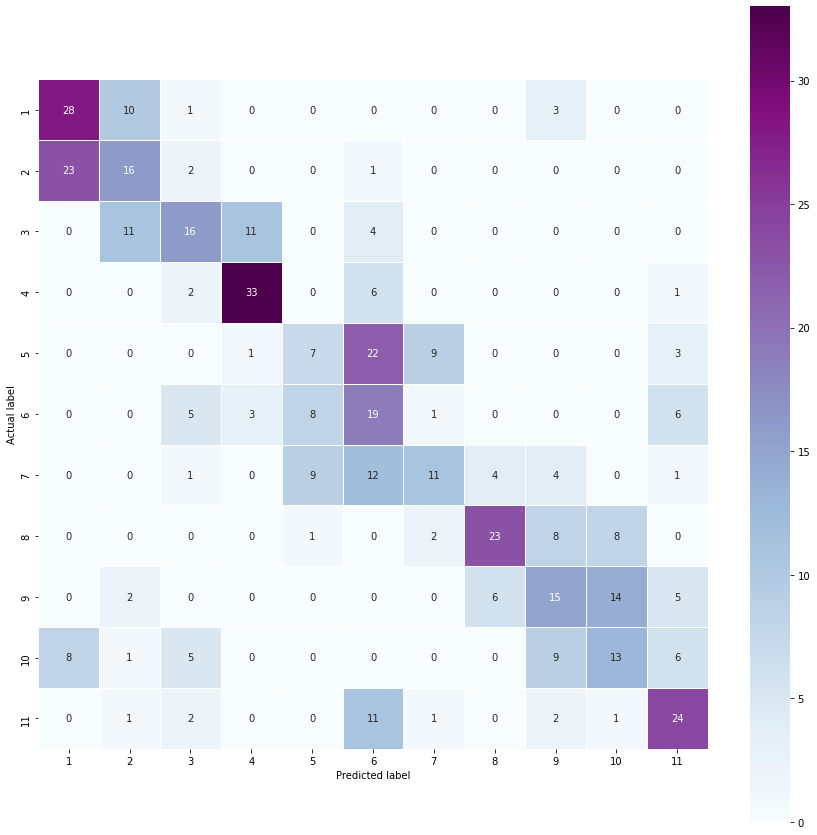

In [10]:
plt.figure(figsize=(15,15))
ax = plt.subplot()
sns.heatmap(confusion_matrix_test_lda, annot=True,
            linewidths=.5, square = True, cmap='BuPu', fmt='g', ax=ax)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.yaxis.set_ticklabels(dat_test['y'].unique())
ax.xaxis.set_ticklabels(dat_test['y'].unique())